# Calculate Power levels for LEO-satellite RFI

## Received signal power spectral flux density


### Signal power levels at the VLA antenna
Measured signal power will depend on whether the transmission and reception are in mainlobes or sidelobes of the UT, Satellite or VLA antennas, and the distance between the emitter and receiver. 

 - Uplinks : UT-antennas are always pointing up. VLA antennas will see only its sidelobes. UT-sidelobe gain = 0 dBi.  Distances from the VLA are given in the above UT location table. The source direction is always assumed to be on the horizon (HA=+/- 90deg) with the DEC derived from an approximate geographical location.  For the UT, we use the documented EIRP (3.2W) along with a sidelobe gain, path length attenuation over the specified distance, and UT transmission bandwidth of 60MHz to calculate the SPFD incident at the VLA antenna. 

 - Downlinks : Satellite footprints have a radius of 22km. If a VLA antenna and the UT are within 22km of each other, we expect that the VLA will see the main-lobe of the satellite transmitter, otherwise a sidelobe.  Main lobe gain = 38.3 dBi.  Sidelobe gain = 0 dBi.  Distances from the VLA are 570km altitude (approximate sats to be overhead at Zenith and located at the direction HA=0deg, DEC=34deg). For the SAT, we use the provided specification of PFD of -146 dB (W/m2/4kHz) at the Earth's surface, from the satellite main beam, and calculate the SPFD incident at the antenna

### Measured signal power levels per antenna
For each UT and SAT location relative to the observation phase center, we first determine whether the VLA will see it in a mainlobe or a sidelobe, and the VLA antenna gain is determined appropriately. We then use the input SPFD value along with the receiver gain, frequency and channel bandwidth, to determine the measured SPFD. This measured SPFD is then translated to units of Jansky. 


## Expected Attenuation after correlation

For a point source at the phase center, the received SPFD levels at each antenna correspond to the measured (and calibrated) visibility amplitudes. For a source located far away from the observation phase center and with a finite bandwidth and integration time, visibilities are attenuated. Here we quantify the degree of attenuation due to two effects, and provide estimates of measured visibility amplitudes. 

Reference : "The response of a radio synthesis array to interfering signals" , Thomson 1982

 - Bandwidth decorrelation : Eqn 18 of Thomson 1982 calculates the Sinc attenuation due the observing channel bandwidth. 

 - Fringe washing : Eqn 3 of Thomson 1982 calculates the attenuation due to the RFI source movement and fringe washing.
 
Eqn 19 combines the two effects. 

This attenuation factor is calculated per baseline, for a given 3D geometry defined by antenna configuration and source and RFI locations and speed of relative movement. 

We additionally define two thresholds against which the predicted visibility amplitudes (across all baselines) are compared. Visibilities above the 'high_thresh' and below a 'low_thresh'. 

Below, we use these thresholds to identify baselines that 
 - have amplitudes stronger than a visibility noise level (of say 1Jy) and therefore detectable in plots of the raw and calibrated data.
 - have amplitudes low enough that they will be below an imaging threshold (assuming the signal is continuous is time/freq).

 
# Predicted attenuation for UT signals

In [103]:
%run -i Predict_Decorr_Script_Sept21.py
#%matplotlib widget

## Example scenarios

In [104]:
obslist = {}

obslist['A'] = {'name':'UT due East on the ground. SAT overhead, OBS at the North Pole',
                'desc': 'This example has the UT close-enough to the array that the antennas are \
                         within the SAT mainlobe. Assume SAT footprint of 22km. This is a \
                         VLA SideLobe + SAT MainLobe combination',
                'direction':'E',
                'dist_ut':10,                          # distance from the center of the array (km)
                'ha_ut':90.0, 'dec_ut':0.0,            # UT on the Horizon, due East (deg)
                'ha_src':0.0, 'dec_src':60.0,          # Phasecenter (deg)
                'ha_sat':0.0, 'dec_sat':34.0,          # SAT Position (deg)
                'speed_ut':0.004, 'speed_sat':0.04,    # Movement relative to phasecenter (deg/sec)
                'freq_ut':12e9, 'freq_sat':14.25e9,    # Transmitting (and rec) frequency
                'obs_bw':125e3, 'obs_int':1.0,         # Channel bandwidth (Hz) and integration time (sec)
                'config':'cfgfiles/vlac.cfg',          # Antenna config. #ngvla-core-revC.cfg', #vlac.cfg',
                'high_thresh':1.0, 'low_thresh':1e-3}  # Thresholds for baseline counts (Jy)


obslist['B'] = {'name':'UT due East on the ground. SAT and OBS overhead',
                'desc': 'This example has the UT far from the array, but has the observation \
                phasecenter 0.5 degree away from the SAT, so VLA MainLobe + SAT MainLobe.. ',
                'direction':'E',
                'dist_ut':10,                          # distance from the center of the array (km)
                'ha_ut':90.0, 'dec_ut':0.0,            # UT on the Horizon, due East (deg)
                'ha_src':0.0, 'dec_src':33.5,          # Phasecenter (deg)
                'ha_sat':0.0, 'dec_sat':34.0,          # SAT Position (deg)
                'speed_ut':0.004, 'speed_sat':0.04,    # Movement relative to phasecenter (deg/sec)
                'freq_ut':1.6e9, 'freq_sat':1.6e9,     # Transmitting (and rec) frequency
                'obs_bw':125e3, 'obs_int':1.0,           # Channel bandwidth (Hz) and integration time (sec)
                'config':'cfgfiles/vlac.cfg',          # Antenna config. #ngvla-core-revC.cfg', #vlac.cfg',
                'high_thresh':1.0, 'low_thresh':1e-3}  # Thresholds for baseline counts (Jy)

obslist['C'] = {'name':'UT North-East on the ground, far away. SAT and OBS far from each other',
                'desc': 'This example has the UT far from the array, and only a VLA SideLobe +\
                SAT SideLobe interaction. Most common case.',
                'direction':'E',
                'dist_ut':100,                         # distance from the center of the array (km)
                'ha_ut':90.0, 'dec_ut':60.0,            # UT on the Horizon, due East (deg)
                'ha_src':-45.0, 'dec_src':34.0,        # Phasecenter (deg)
                'ha_sat':+45.0, 'dec_sat':34.0,        # SAT position (deg)
                'speed_ut':0.004, 'speed_sat':0.04,    # Movement relative to phasecenter (deg/sec)
                'freq_ut':2.3e9, 'freq_sat':2.4e9,     # Transmitting (and rec) frequency
                'obs_bw':125e3, 'obs_int':1.0,           # Channel bandwidth (Hz) and integration time (sec)
                'config':'cfgfiles/vlac.cfg',          # Antenna config. #ngvla-core-revC.cfg', #vlac.cfg',
                'high_thresh':1.0, 'low_thresh':1e-3}  # Thresholds for baseline counts (Jy)

obslist['D'] = {'name':'Test Setup with only SideLobe SideLobe interactions',
                'desc': 'Edit channel bandwidth and integration time, to show attenuation effects',
                'direction':'E',
                'dist_ut':100,                         # distance from the center of the array (km)
                'ha_ut':90.0, 'dec_ut':0.0,            # UT on the Horizon, due East (deg)
                'ha_src':-45.0, 'dec_src':34.0,        # Phasecenter (deg)
                'ha_sat':+45.0, 'dec_sat':34.0,        # SAT position (deg)
                'speed_ut':0.004, 'speed_sat':0.04,    # Movement relative to phasecenter (deg/sec)
                'freq_ut':2.3e9, 'freq_sat':2.4e9,     # Transmitting (and rec) frequency
#                'obs_bw':50e3, 'obs_int':0.02,         # Channel bandwidth (Hz) and integration time (sec)
#                'obs_bw':250e3, 'obs_int':0.1,         # Channel bandwidth (Hz) and integration time (sec)
                'obs_bw':1e6, 'obs_int':2.0,           # Channel bandwidth (Hz) and integration time (sec)
                'config':'cfgfiles/vlac.cfg',          # Antenna config. #ngvla-core-revC.cfg', #vlac.cfg',
                'high_thresh':1.0, 'low_thresh':1e-3}  # Thresholds for baseline counts (Jy)

obslist['E'] = {'name':'Test Setup to show attenuation due to projected baseline lengths',
                'desc': 'Edit OBS and SAT angular difference, and array configuration. \
                SAT Speed = 0 deg/sec',
                'direction':'E',
                'dist_ut':100,                         # distance from the center of the array (km)
                'ha_ut':90.0, 'dec_ut':0.0,            # UT on the Horizon, due East (deg)
#                'ha_src':0.0, 'dec_src':34.0,           # Phasecenter (deg) : Same as SAT. No attenuation
                'ha_src':45.0, 'dec_src':20.0,           # Phasecenter (deg) : 45deg away
#                'ha_src':90.0, 'dec_src':0.0,            # Phasecenter (deg) : 90 deg away
                'ha_sat':0.0, 'dec_sat':34.0,          # SAT position (deg)
                'speed_ut':0.004, 'speed_sat':0.06,    # Movement relative to phasecenter (deg/sec)
#                'speed_ut':0.0, 'speed_sat':0.00,    # Movement relative to phasecenter (deg/sec)
                'freq_ut':2.3e9, 'freq_sat':2.4e9,     # Transmitting (and rec) frequency
                'obs_bw':1e6, 'obs_int':0.02,         # Channel bandwidth (Hz) and integration time (sec)
#                'config':'cfgfiles/vlad.cfg',            # Antenna config. 
#                'config':'cfgfiles/vlac.cfg',            # Antenna config. 
                'config':'cfgfiles/vlac_East.cfg',       # Antenna config. Only one arm (straight line)
#                'config':'cfgfiles/vlab.cfg',            # Antenna config. 
#                'config':'cfgfiles/vlaa.cfg',            # Antenna config. 
#                'config':'cfgfiles/ngvla-core-revC.cfg', # Antenna config. 
#                'config':'cfgfiles/ngvla-main-revC.cfg', # Antenna config. 
                'high_thresh':1.0, 'low_thresh':1e-3}  # Thresholds for baseline counts (Jy)


obs = obslist['C']

## Calculate received SPFD

In [105]:
%run -i Predict_Decorr_Script_Sept21.py

print("Setup : %s"%(obs['name']))
summary = calc_received_power(
                    ha_src=obs['ha_src'],         # ---
                    dec_src=obs['dec_src'],       # Observation Phasecenter
                    ha_ut = obs['ha_ut'],         # ---
                    dec_ut = obs['dec_ut'],       # UT Location Direction
                    dist_ut = obs['dist_ut'],     # Distance to UT (km)
                    freq_ut = obs['freq_ut'],     # UT uplink frequency (11, 12, 13 GHz)
                    ha_sat=obs['ha_sat'],         # ---
                    dec_sat=obs['dec_sat'],       # SAT Location
                    freq_sat = obs['freq_sat'],   # SAT downlink frequency
                    obs_bw=obs['obs_bw']);        # Observation channel bw in Hz.

Setup : UT North-East on the ground, far away. SAT and OBS far from each other
Phasecenter and RFI are 78.98 deg apart. PB main lobe at 2.30 GHz : 0.30 deg.

UT Up-Link --> Beam Interaction : UT SideLobe and VLA SideLobe 
SPFD incident at the VLA antenna from 100.00 km distance : -183.72 [dB W/m2/Hz] 
VLA SideLobe gain : 0.00 dB
Recd power in one 125kHz channel :	 -161.44 dB W 		[7.17e-17 W]
Recd spectral flux density :		 -238.07 dB W/m2/Hz 	[1.56e-24 W/m2/Hz] [1.56e+02 Jy]
Phasecenter and RFI are 71.78 deg apart. PB main lobe at 2.40 GHz : 0.29 deg.

SAT Down-Link --> Beam Interaction : SAT SideLobe and VLA SideLobe 
SPFD incident at the VLA antenna from 570.00 km distance : -220.32 [dB W/m2/Hz] 
VLA SideLobe gain : 0.00 dB
Recd power in one 125kHz channel :	 -198.41 dB W 		[1.44e-20 W]
Recd spectral flux density :		 -275.04 dB W/m2/Hz 	[3.13e-28 W/m2/Hz] [3.13e-02 Jy]


## Calculate visibility amplitude after attenuation

### For the UT signals


Phasecenter :	  Hour angle : -45.0000 deg 	  Declination : 34.0000 deg
RFI location:	  Hour angle : 90.0000 deg 	  Declination : 60.0000 deg
RFI speed : 0.0040 deg/sec

Observing freq : 2.3000 GHz 	 Channel width : 125.0000 kHz
Array Config : cfgfiles/vlac.cfg

Received SPFD at each antenna : 1.56e+02 Jy

Baseline Count :  Above 1.0e+00 Jy : 342 	  Below 1.0e-03 Jy : 0 	  In-between 9 
Median Vis Amplitude : 4.9e+01 Jy	 [Max:1.6e+02 Jy, Min:3.1e-02 Jy]


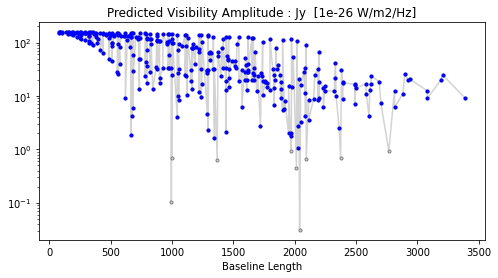

In [106]:
%run -i Predict_Decorr_Script_Sept21.py
#%matplotlib widget

### UT UpLink
attenuation_ut = decorr_predict_tool(
        ha_src=obs['ha_src'],      # ---
        dec_src=obs['dec_src'],    # Observation phasecenter 
        ha_rfi=obs['ha_ut'],     # ---
        dec_rfi=obs['dec_ut'],     # UT is due East
        speed_rfi=obs['speed_ut'], # Earth Rotation speed
        rec_power_spfd = summary['UT']['recd_spfd_jy'],
        freq_obs=obs['freq_ut'], # Observation Frequency
        obs_bw=obs['obs_bw'],    # Observation channel width
        tau=obs['obs_int'],         # Observation integration time
        cfg=obs['config'],     #ngvla-core-revC.cfg', #vlac.cfg',
        high_thresh=obs['high_thresh'],   # 1Jy vis noise level 
        low_thresh=obs['low_thresh'],   # 1mJy source brightness 
        ylog=True)

### For the SAT signals


Phasecenter :	  Hour angle : -45.0000 deg 	  Declination : 34.0000 deg
RFI location:	  Hour angle : 45.0000 deg 	  Declination : 34.0000 deg
RFI speed : 0.0400 deg/sec

Observing freq : 2.4000 GHz 	 Channel width : 125.0000 kHz
Array Config : cfgfiles/vlac.cfg

Received SPFD at each antenna : 3.13e-02 Jy

Baseline Count :  Above 1.0e+00 Jy : 0 	  Below 1.0e-03 Jy : 127 	  In-between 224 
Median Vis Amplitude : 2.6e-03 Jy	 [Max:3.1e-02 Jy, Min:5.4e-07 Jy]


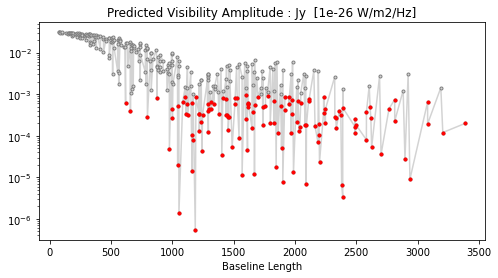

In [107]:
%run -i Predict_Decorr_Script_Sept21.py
#%matplotlib widget

### SAT downlink
attenuation_sat = decorr_predict_tool(
        ha_src=obs['ha_src'],      # ---
        dec_src=obs['dec_src'],    # Observation phasecenter 
        ha_rfi=obs['ha_sat'],       # ---
        dec_rfi=obs['dec_sat'],     # SAT Location
        speed_rfi=obs['speed_sat'],  # Satellite speed
        rec_power_spfd = summary['SAT']['recd_spfd_jy'],
        freq_obs=obs['freq_sat'], # Observation Frequency
        obs_bw=obs['obs_bw'],    # Observation channel width
        tau=obs['obs_int'],         # Observation integration time
        cfg=obs['config'], #ngvla-core-revC.cfg', #vlac.cfg',
        high_thresh=obs['high_thresh'],   # 1Jy vis noise level (div by 1e6 vis to get image noise of 1mJy)
        low_thresh=obs['low_thresh'],   # 1mJy source brightness.
        ylog=True)   

## Summary

In [108]:
print("\nSetup : %s"%(obs['name']))
print("\nDescription : %s"%(obs['desc']))

print_summary(summary, attenuation_ut,attenuation_sat)


Setup : UT North-East on the ground, far away. SAT and OBS far from each other

Description : This example has the UT far from the array, and only a VLA SideLobe +                SAT SideLobe interaction. Most common case.


,UT,SAT
Beam Interaction,VLA SideLobe + UT SideLobe,VLA SideLobe + SAT SideLobe
Distance : VLA to RFI [km],100.00 km,570.00 km
Angular Separation : Obs to RFI [deg],78.98 deg,71.78 deg
"SPFD Measured per antenna [Jy,dB]",1.6e+02 Jy [-238.1 dB],3.1e-02 Jy [-275.0 dB]
"Median Visibility Amp [Jy, dB]",4.9e+01 Jy [-243.1 dB],2.6e-03 Jy [-285.8 dB]
"Max Visibility Amp [Jy],dB",1.6e+02 Jy [-238.1 dB],3.1e-02 Jy [-275.1 dB]
"Min Visibility Amp [Jy],dB",3.1e-02 Jy [-275.1 dB],5.4e-07 Jy [-322.6 dB]
Baseline Count : > 1.0 Jy (-260.0 dB),97.44 %,0.00 %
Baseline Count : < 0.001 Jy (-290.0 dB),0.00 %,36.18 %
